In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analysts jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

208965    111175.0
365886     26444.0
691749     83500.0
485526     62500.0
603802     84000.0
187488    127500.0
28365      90000.0
285352     50000.0
366463    105000.0
12999      90000.0
Name: salary_year_avg, dtype: float64

<Axes: >

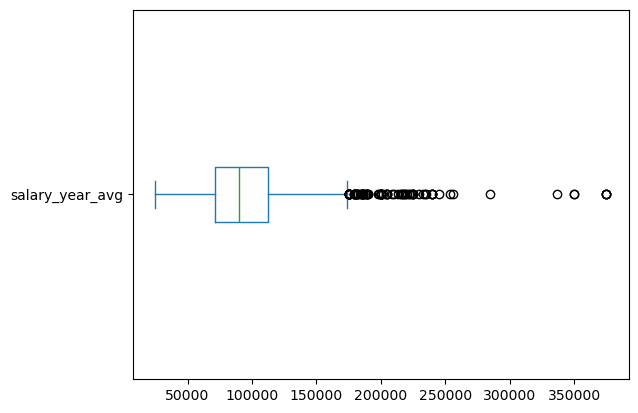

In [5]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x276fdc5d110>,
 'caps': [<matplotlib.lines.Line2D at 0x276fdc5e5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x276fdc5c850>],
 'medians': [<matplotlib.lines.Line2D at 0x276fdc5f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x276fdc1f0d0>],
 'means': []}

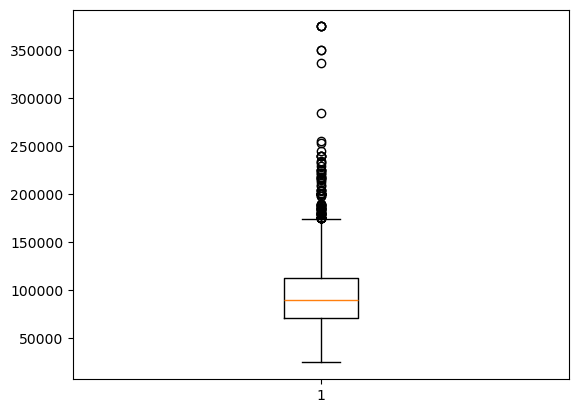

In [4]:
# another way to do the boxplot with matplotlib
plt.boxplot(df_DA_US['salary_year_avg'])

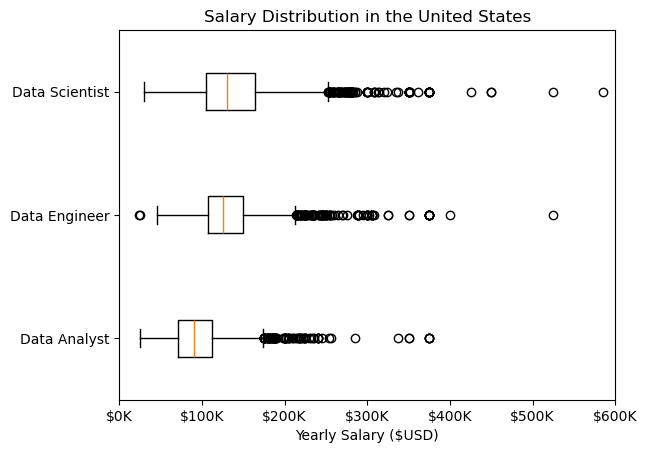

In [16]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job_titles

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset='salary_year_avg')

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles] 

plt.boxplot(job_list, tick_labels=job_titles, vert=False) # received a message matplotlib has renamed labels to tick_labels
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [10]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64